# Restaurant Review Prediction

Reading restaurants reviews is a common way for customers learn about the menu, food quality, and previous patrons’ experiences. However, some reviews share negative experiences and may turn customers away thus hindering the restaurant’s business. Using an online data set, we would like to train different Machine Learning models to predict a Negative or Positive sentiment based on a patron’s review. 

Data Source: https://www.kaggle.com/datasets/gorororororo23/european-restaurant-reviews  

# Import Libraries and Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('European Restaurant Reviews.csv')

 # Exploratory Data Analysis

Let's take a look at our data

In [3]:
df.head()

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          1502 non-null   object
 1   Restaurant Name  1502 non-null   object
 2   Sentiment        1502 non-null   object
 3   Review Title     1502 non-null   object
 4   Review Date      1502 non-null   object
 5   Review           1502 non-null   object
dtypes: object(6)
memory usage: 70.5+ KB


There's no non-null objects on our data. Let's check for repeated entries and drop them from our data

In [5]:
df.duplicated().sum()

49

In [7]:
df = df.drop_duplicates()

### Data Visualization 

/var/folders/l1/r5wnb9_97n54vngd7ssrz5l80000gn/T/ipykernel_17208/3204865320.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x = 'Country',palette= 'muted')


Text(0.5, 1.0, 'Countries with Reviews')

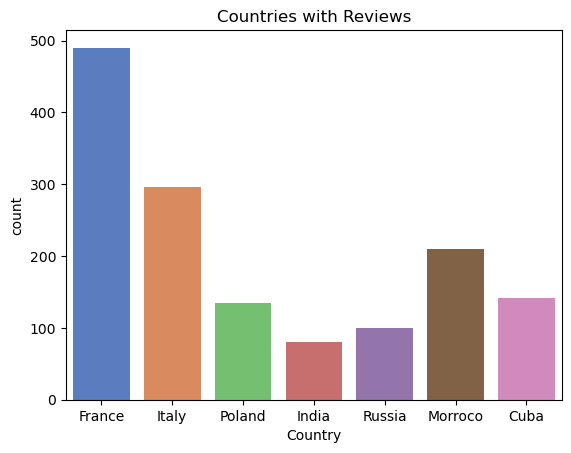

In [9]:
sns.countplot(df,x = 'Country',palette= 'muted')
plt.title('Countries with Reviews')

Text(0.5, 1.0, 'Count of Review Sentiment by Country')

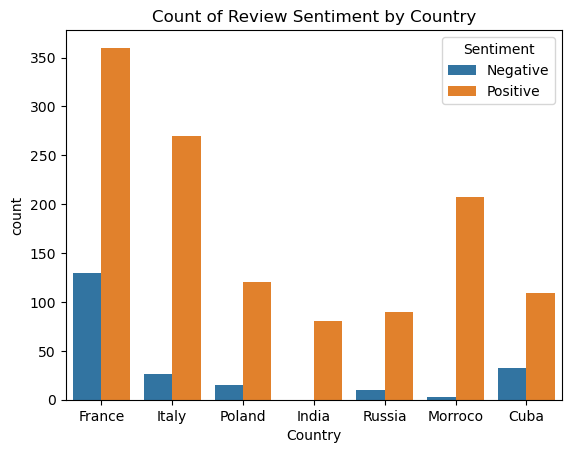

In [10]:
sns.countplot(df,x = 'Country',hue= 'Sentiment')
plt.title('Count of Review Sentiment by Country')

Text(0.5, 1.0, 'Count of Review Sentiment by Country')

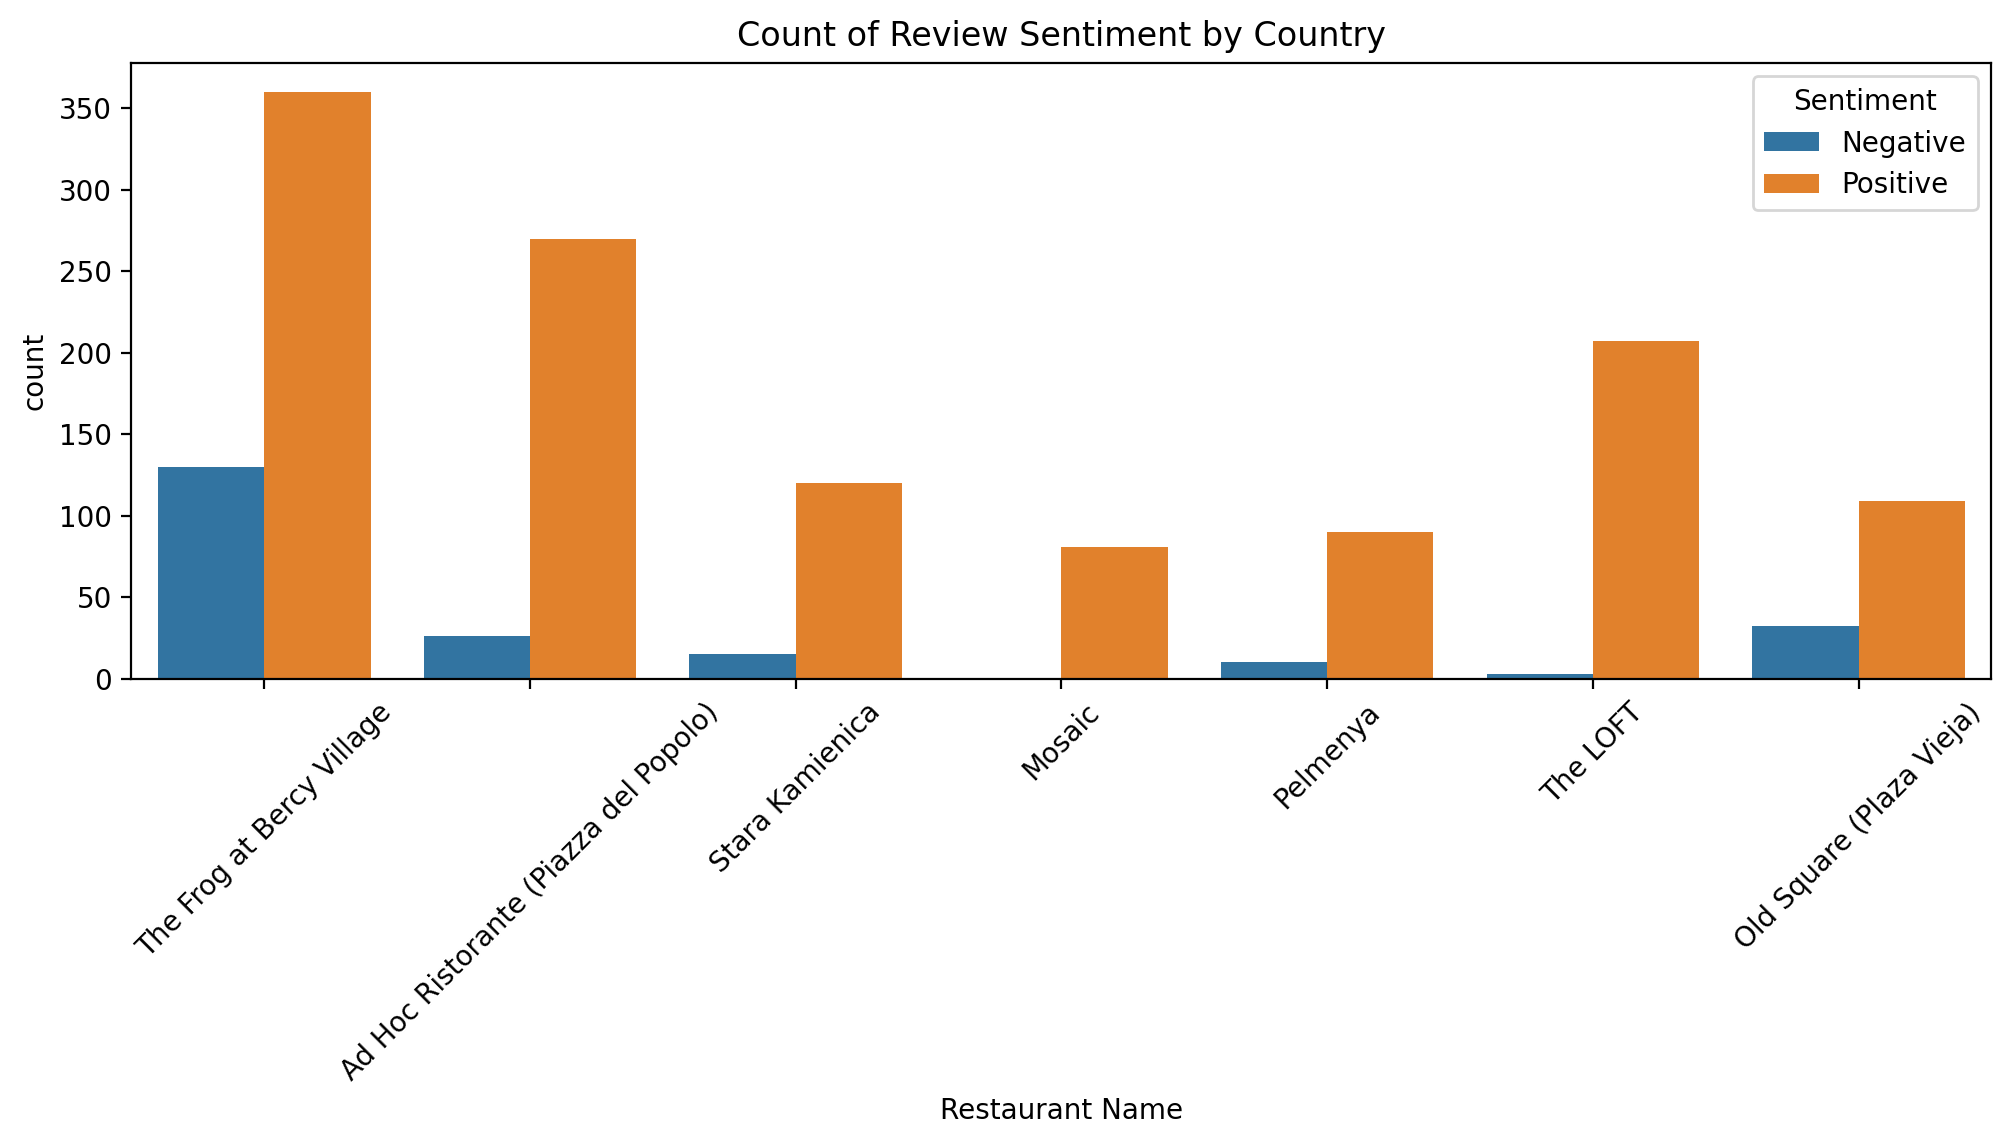

In [11]:
plt.figure(figsize=(12,4),dpi = 200)
sns.countplot(df,x = 'Restaurant Name',hue = 'Sentiment')
plt.xticks(rotation = 45);
plt.title('Count of Review Sentiment by Country')

In [12]:
df['Restaurant Name'].value_counts()

Restaurant Name
The Frog at Bercy Village                490
Ad Hoc Ristorante (Piazza del Popolo)    296
The LOFT                                 210
Old Square (Plaza Vieja)                 141
Stara Kamienica                          135
Pelmenya                                 100
Mosaic                                    81
Name: count, dtype: int64

After visually exploring the data, we can continue to create models to train and predict the sentiment based on a customer review. Let's start by splitting our feature (X) and label (y). 

In [13]:
X = df['Review']

In [14]:
y = df['Sentiment']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=101)

Since we are using text as our data, we can use a TfidVectorizer to transform our reviews to a meaningul number representation and properly fit our models. 

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfid = TfidfVectorizer(stop_words='english')

In [19]:
X_train_tfid = tfid.fit_transform(X_train)

In [20]:
X_test_tfid = tfid.transform(X_test)

We will be testing four different models - Multinomial Naive Bayes, Logistic Regression, Linear SVC, and Random Forest Classifier

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,mean_squared_error,mean_absolute_error

In [26]:
mnb = MultinomialNB()

In [49]:
mnb.fit(X_train_tfid,y_train)
mng_predict = mnb.predict(X_test_tfid)
print(classification_report(y_test,mng_predict))

              precision    recall  f1-score   support

    Negative       1.00      0.03      0.05        72
    Positive       0.84      1.00      0.91       364

    accuracy                           0.84       436
   macro avg       0.92      0.51      0.48       436
weighted avg       0.87      0.84      0.77       436



In [30]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression()
lr.fit(X_train_tfid,y_train)
lr_pred = lr.predict(X_test_tfid)
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

    Negative       1.00      0.18      0.31        72
    Positive       0.86      1.00      0.93       364

    accuracy                           0.86       436
   macro avg       0.93      0.59      0.62       436
weighted avg       0.88      0.86      0.82       436



In [51]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(X_train_tfid,y_train)
lsvc_pred = lsvc.predict(X_test_tfid)
print(classification_report(y_test,lsvc_pred))

              precision    recall  f1-score   support

    Negative       1.00      0.67      0.80        72
    Positive       0.94      1.00      0.97       364

    accuracy                           0.94       436
   macro avg       0.97      0.83      0.88       436
weighted avg       0.95      0.94      0.94       436



/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_tfid,y_train)
rfc_pred = rfc.predict(X_test_tfid)
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

    Negative       1.00      0.28      0.43        72
    Positive       0.88      1.00      0.93       364

    accuracy                           0.88       436
   macro avg       0.94      0.64      0.68       436
weighted avg       0.90      0.88      0.85       436



After training different models, let's compare how they perform in regards to predicting the correct sentiment. Let's take a look at the confusion matrix for each model. 

In [46]:
#Multinomial Naive Bayes Confusion Matrix Display 
mng_confusion = ConfusionMatrixDisplay(confusion_matrix(y_test,mng_predict),
                                       display_labels=['Negative','Positive'])

#Logistic Regression Confusion Matrix Display 
lr_confusion = ConfusionMatrixDisplay(confusion_matrix(y_test,lr_pred),
                                      display_labels=['Negative','Positive'])

#Linear SVC Confusion Matrix Display 
lsvc_confusion = ConfusionMatrixDisplay(confusion_matrix(y_test,lsvc_pred),
                                        display_labels=['Negative','Positive'])

#RFC Confusion Matrix 
rfc_confusion = ConfusionMatrixDisplay(confusion_matrix(y_test,rfc_pred),
                                       display_labels=['Negative','Positive'])

In [47]:
model = [mng_confusion,lr_confusion,lsvc_confusion,rfc_confusion]
model_name = ['Multinomial Naive Bayes','Logistic Regression','Linear SVC','Random Forest Classifier']

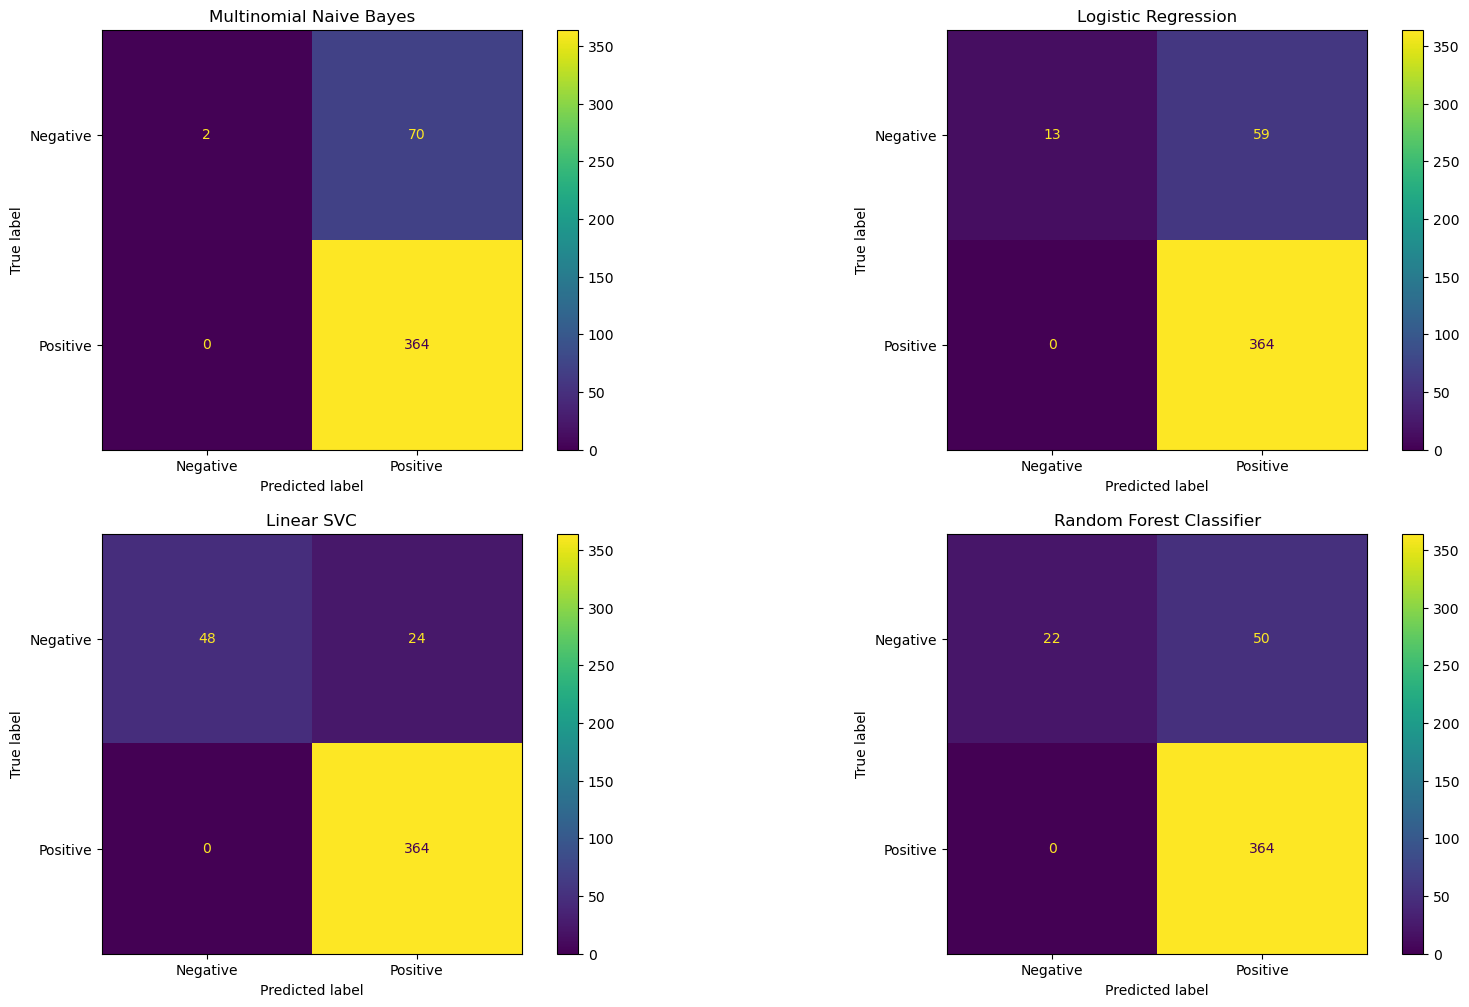

In [59]:
f,ax = plt.subplots(2,2,figsize=(20,12))
x = 0
for i in range(0,2):
    for j in range(0,2):
        model[x].plot(ax = ax[i][j])
        ax[i][j].set_title(model_name[x])
        x+=1

### Conclusions 

We note that lowest performing model comes from the MultinomialNB - predicting the highest number of false positive review. In contrast, the best performing model is the LinearSVC model - with the least number of false positive predictions (24) and the highest true positive "Negative" reviews. 
